In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ETH-USD.csv')

In [49]:
data.head()

,Close,High,Low,Transactions,Open,Timestamp,Volume,AVG_Price_Volume,day
date,,,,,,,,,
2021-01-01 00:00:00,735.690000,740.69,729.560,9094,737.89,2021-01-01 00:00:00,20287.999627,734.1584,1
2021-01-01 01:00:00,749.880000,750.34,733.300,11763,735.75,2021-01-01 01:00:00,27631.539090,744.5973,1
2021-01-01 02:00:00,745.540000,750.06,741.140,8042,749.93,2021-01-01 02:00:00,21643.368937,746.0609,1
2021-01-01 03:00:00,746.170000,748.55,743.432,6296,745.85,2021-01-01 03:00:00,19529.505385,746.0002,1
2021-01-01 04:00:00,743.024898,748.53,738.473,7147,746.17,2021-01-01 04:00:00,22764.597861,744.2948,1


In [9]:
data['day'] = pd.DatetimeIndex(data['Timestamp']).day

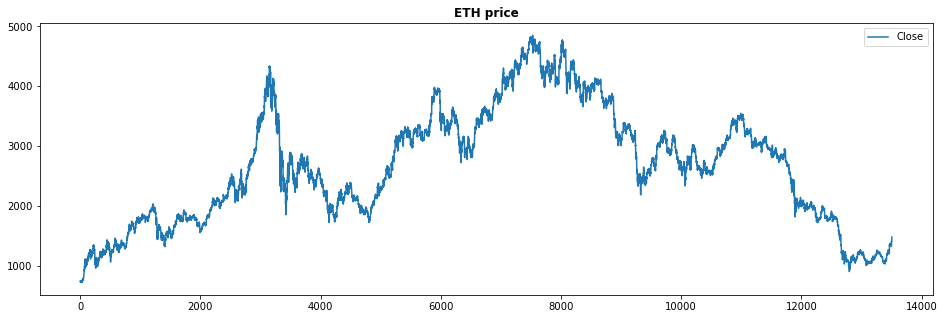

In [17]:
plot_fields =  ['Close']

fig = plt.figure(figsize=(16, 5))

plt.plot(data[plot_fields])
plt.legend(plot_fields)

plt.title("ETH price", weight="bold")

plt.show()

In [30]:
data['date'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('date')

In [44]:
data_week = data['Close'].resample('D').mean()

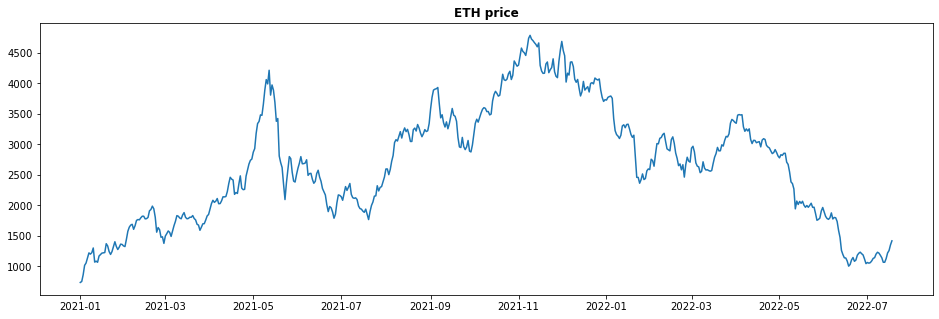

In [45]:
fig = plt.figure(figsize=(16, 5))

plt.plot(data_week)

plt.title("ETH price", weight="bold")

plt.show()

In [46]:
data['Close'].describe()

count    13507.000000
mean      2660.739932
std        957.526603
min        721.800000
25%       1882.175000
50%       2651.110000
75%       3314.765000
max       4849.040000
Name: Close, dtype: float64

In [47]:
data_week.describe()

count     564.000000
mean     2659.560275
std       956.654231
min       736.699996
25%      1885.599149
50%      2668.624583
75%      3327.334896
max      4789.718802
Name: Close, dtype: float64

In [52]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(data['Close'][n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

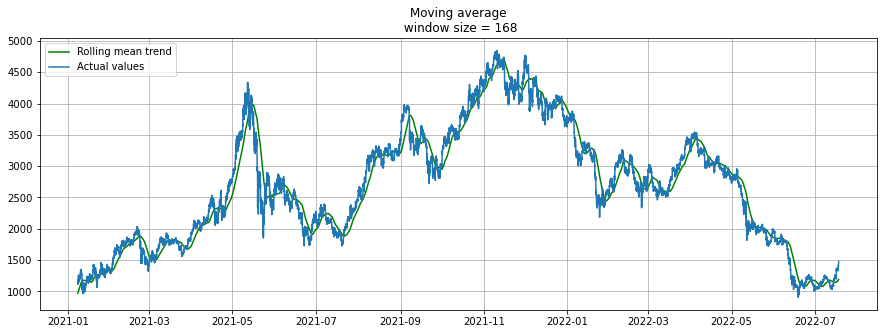

In [54]:
plotMovingAverage(data['Close'], 24*7) # сглаживание по неделям

In [55]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

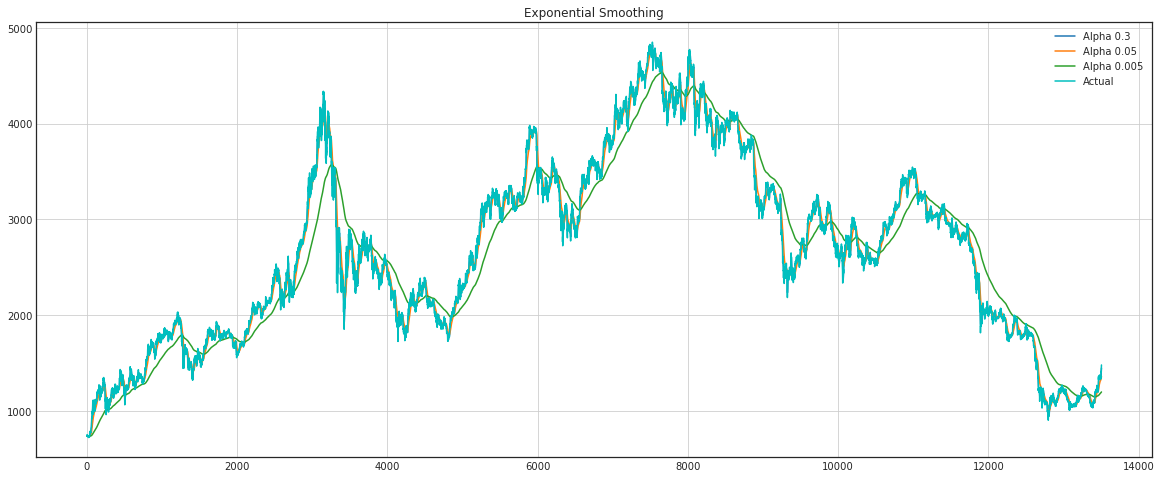

In [57]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05, 0.005]:
        plt.plot(exponential_smoothing(data.Close, alpha), label="Alpha {}".format(alpha))
    plt.plot(data.Close.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

In [58]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

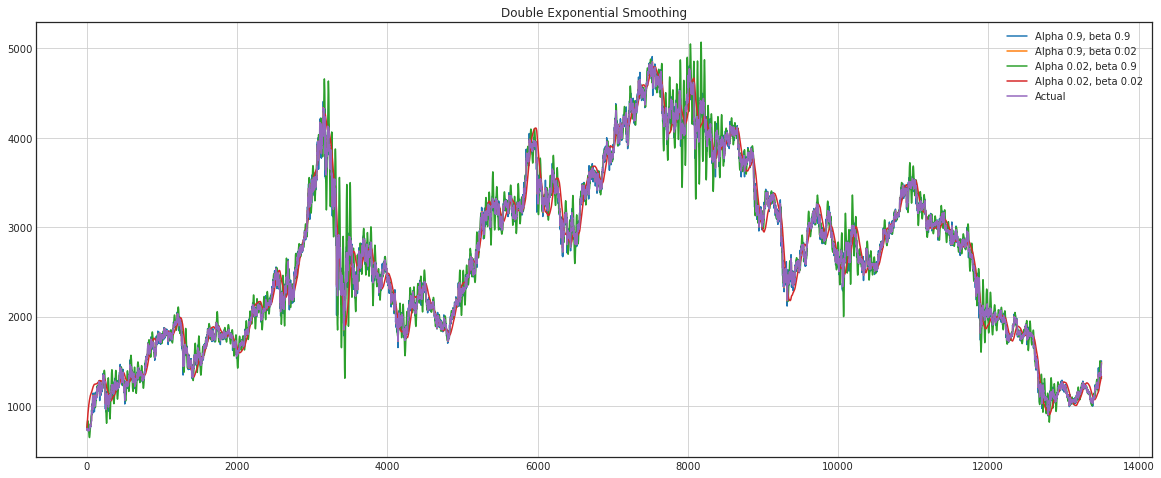

In [59]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(data.Close, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(data.Close.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

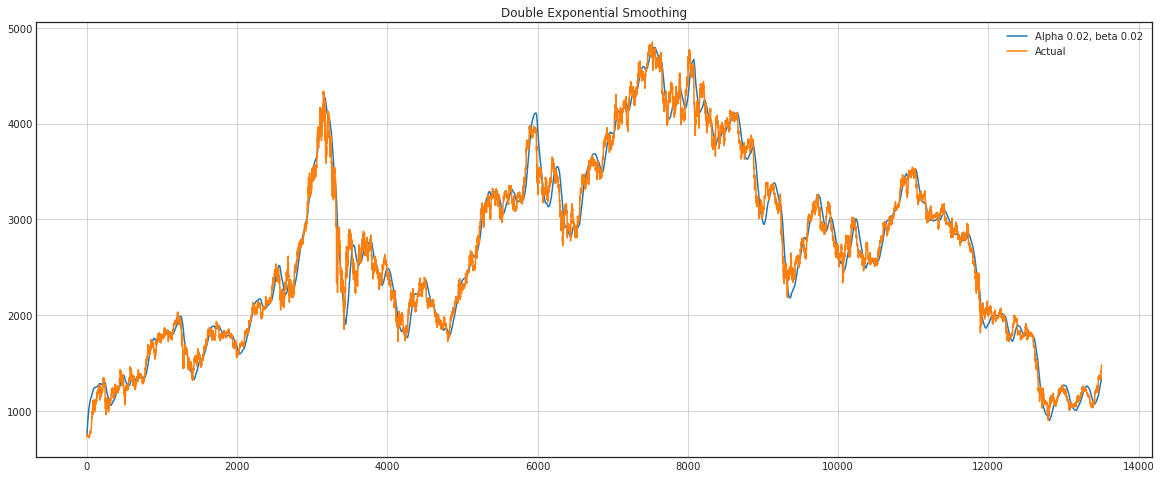

In [60]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.02]:
        for beta in [0.02]:
            plt.plot(double_exponential_smoothing(data.Close, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(data.Close.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)